# 1) Get and understand your data

In [1]:

# Import some libraries

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

# Import some data
digits = load_digits()
# Show dimensionality
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

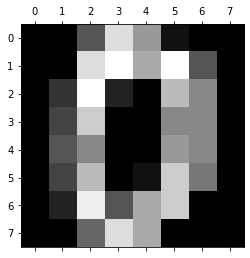

In [2]:
# Show one data

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

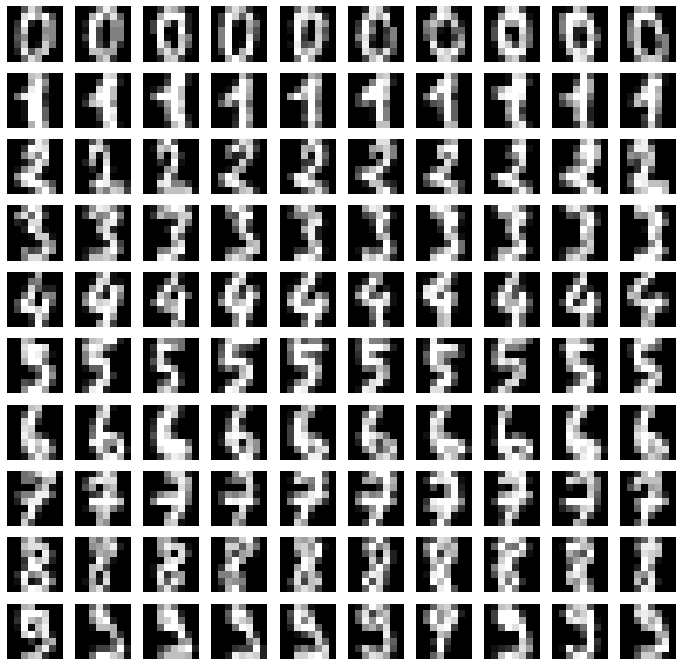

In [3]:

# Show several data for each label (== category) 

X = digits.images
Y = digits.target



n_digits = np.unique(Y)

M = 10
dim = int(np.sqrt(X.shape[1]))

fig, axs = plt.subplots(len(n_digits), M, figsize=(12, 12))

for i, d in enumerate(n_digits):
    for j in range(M):
        axs[i,j].imshow(X[Y == d][j])
        axs[i,j].axis('off')

### What is the type of the data ?

Data's are Images, it is Object type

### How many pixel has one data instance ?

One data instance have 64 pixel, 8x8

### What is the type of data of one pixel ? what does it represents ?

The type of data of one pixel is Float, it represents the variation of gray color.

# 2) Prepare your ML algorithm

### explain the purpose of the training set ?

The training set, which will allow us to train our model and will be used by the learning algorithm.

### explain the purpose of the testing set ?

The testing set, which measures the error of the final model on data it has never seen. We will simply pass this data as if it were data that we have never encountered before (as it will then happen in practice to predict new data) and measure the performance of our model on this data. . This is also called held-out data, to emphasize that this is data that we will not touch before the very end to be able to be sure that the model is working.

### split data

In [4]:
X = digits.data
Y = digits.target

X = digits.images.reshape((len(digits.images), -1))

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# 3) Predict Digits

## Algorithm Classification 1 : SKlearn.linear_model LogisticRegression

In [5]:
y_train[y_train != 8] = 0
y_test[y_test != 8] = 0
y_train[y_train == 8] = 1
y_test[y_test == 8] = 1

from sklearn.linear_model import LogisticRegression
    
logisticRegr = LogisticRegression(max_iter = 3500)

logisticRegr.fit(x_train, y_train)

predictions = logisticRegr.predict(x_test)
print(predictions[:50])
print(y_test[:50])

[0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0]


### Accuracy, Precision

In [6]:

from sklearn.metrics import accuracy_score

print("Accuracy : %s"% accuracy_score(y_test, predictions))


from sklearn.metrics import precision_score

print("\nPrecision : %s"% precision_score(y_test, predictions, average=None))

Accuracy : 0.9611111111111111

Precision : [0.97230769 0.85714286]


### Recall

In [7]:
from sklearn.metrics import recall_score, classification_report

print("Recall : %s"% recall_score(y_test, predictions, average=None, zero_division=1))

Recall : [0.98442368 0.76923077]


### Classification report

In [8]:
log_report1 = classification_report(y_test, predictions)
print(log_report1)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       321
           1       0.86      0.77      0.81        39

    accuracy                           0.96       360
   macro avg       0.91      0.88      0.89       360
weighted avg       0.96      0.96      0.96       360



## Algorithm Classification 2 : MLP Neural Network

In [9]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

y_train[y_train != 8] = 0
y_test[y_test != 8] = 0
y_train[y_train == 8] = 1
y_test[y_test == 8] = 1

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.09, verbose=True, max_iter=250)

In [10]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 0.38018663
Iteration 2, loss = 0.31119361
Iteration 3, loss = 0.30155675
Iteration 4, loss = 0.28202813
Iteration 5, loss = 0.26092410
Iteration 6, loss = 0.23215638
Iteration 7, loss = 0.20475918
Iteration 8, loss = 0.17658393
Iteration 9, loss = 0.16178061
Iteration 10, loss = 0.13528439
Iteration 11, loss = 0.12486824
Iteration 12, loss = 0.16058101
Iteration 13, loss = 0.14510797
Iteration 14, loss = 0.15415155
Iteration 15, loss = 0.12494840
Iteration 16, loss = 0.12064747
Iteration 17, loss = 0.11921484
Iteration 18, loss = 0.11211344
Iteration 19, loss = 0.15223480
Iteration 20, loss = 0.10299260
Iteration 21, loss = 0.09492422
Iteration 22, loss = 0.09523583
Iteration 23, loss = 0.11077948
Iteration 24, loss = 0.08954474
Iteration 25, loss = 0.09719131
Iteration 26, loss = 0.08348369
Iteration 27, loss = 0.11462071
Iteration 28, loss = 0.10082719
Iteration 29, loss = 0.08790273
Iteration 30, loss = 0.07351116
Iteration 31, loss = 0.08069555
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.09, max_iter=250, random_state=1,
              solver='sgd', verbose=True)

In [11]:
predictions = mlp.predict(x_test)
predictions[:100] 

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [12]:
y_test[:100]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

### Accuracy, Precision, Recall

In [13]:
print("Accuracy : %s"% accuracy_score(y_test, predictions))


from sklearn.metrics import precision_score

print("\nPrecision : %s"% precision_score(y_test, predictions, average=None))

print("\nRecall : %s"% recall_score(y_test, predictions, average=None, zero_division=1))

Accuracy : 0.9861111111111112

Precision : [0.98466258 1.        ]

Recall : [1.         0.87179487]


### Classification report

In [14]:
mlp_report1 = classification_report(y_test, predictions)
print(mlp_report1)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       321
           1       1.00      0.87      0.93        39

    accuracy                           0.99       360
   macro avg       0.99      0.94      0.96       360
weighted avg       0.99      0.99      0.99       360



## Algorithm Classification 3 : SVM SVC

In [15]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

y_train[y_train != 8] = 0
y_test[y_test != 8] = 0
y_train[y_train == 8] = 1
y_test[y_test == 8] = 1

from sklearn import svm


clf = svm.SVC(kernel='linear')


clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

print(predictions[:100])

[0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [16]:
print(y_test[:100])

[0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]


### Accuracy, Precision, Recall

In [17]:
print("Accuracy : %s"% accuracy_score(y_test, predictions))


from sklearn.metrics import precision_score

print("\nPrecision : %s"% precision_score(y_test, predictions, average=None))

print("\nRecall : %s"% recall_score(y_test, predictions, average=None, zero_division=1))

Accuracy : 0.9527777777777777

Precision : [0.96625767 0.82352941]

Recall : [0.98130841 0.71794872]


### Classification report

In [18]:
svc_report1 = classification_report(y_test, predictions)
print(svc_report1)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       321
           1       0.82      0.72      0.77        39

    accuracy                           0.95       360
   macro avg       0.89      0.85      0.87       360
weighted avg       0.95      0.95      0.95       360



## Conclusion

In [19]:
print("Logistic Regession :\n %s"% log_report1)

print("\n\nMLP :\n %s"% mlp_report1)

print("\n\nSVC : \n %s"% svc_report1)

Logistic Regession :
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       321
           1       0.86      0.77      0.81        39

    accuracy                           0.96       360
   macro avg       0.91      0.88      0.89       360
weighted avg       0.96      0.96      0.96       360



MLP :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       321
           1       1.00      0.87      0.93        39

    accuracy                           0.99       360
   macro avg       0.99      0.94      0.96       360
weighted avg       0.99      0.99      0.99       360



SVC : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       321
           1       0.82      0.72      0.77        39

    accuracy                           0.95       360
   macro avg       0.89      0.85      0.87       360
weighted avg       0.95      0.95


#### We can notice that in the case of a binary logistic regression the MLP Neural network model is the most efficient with an accuracy score of 0.98, precision and recall scores really superior to the other algorhitm

### How many input data the algorithms needs the be efficient ? 

We need 5% of data to have 90+% precision on the model

# 4) Multi-class classification

## Multi-class / Algorithm 1 : LogisticRegression

In [20]:
X = digits.data
Y = digits.target

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

from sklearn.linear_model import LogisticRegression
    
logisticRegr = LogisticRegression(max_iter = 3500)

In [21]:
logisticRegr.fit(x_train, y_train)

predictions = logisticRegr.predict(x_test)
print(predictions[:100])
print(y_test[:100])

score = logisticRegr.score(x_test, y_test)
print("\n Accuracy : %s"% score)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 9 3 7 5 1 2 8 9 3 1 4 7 4 8 5 8]
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8]

 Accuracy : 0.9583333333333334


### Confusion matrice

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  2  1]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  1 39]]


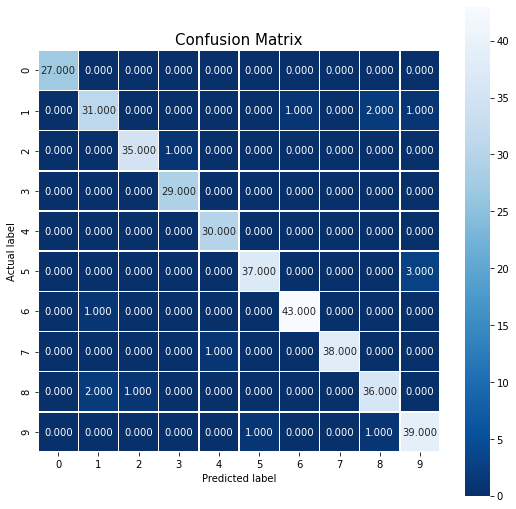

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Confusion Matrix", size = 15);

### Classification report

In [23]:
print("Accuracy : %s\n" % metrics.accuracy_score(y_test, predictions))

log_report2 = classification_report(y_test, predictions)
print(log_report2)

Accuracy : 0.9583333333333334

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.89      0.90        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.98        29
           4       0.97      1.00      0.98        30
           5       0.97      0.93      0.95        40
           6       0.98      0.98      0.98        44
           7       1.00      0.97      0.99        39
           8       0.92      0.92      0.92        39
           9       0.91      0.95      0.93        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



## Multi-class / Algorithm 2 : MLP Neuronal Network

In [24]:
print(digits.images.shape)
print(digits.target.shape)
print(digits.target)

(1797, 8, 8)
(1797,)
[0 1 2 ... 8 9 8]


In [25]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape


(1797, 64)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [27]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.09, verbose=True, max_iter=3000)

In [28]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.16426927
Iteration 2, loss = 1.72859239
Iteration 3, loss = 1.32342952
Iteration 4, loss = 0.97430063
Iteration 5, loss = 0.71357597
Iteration 6, loss = 0.55198478
Iteration 7, loss = 0.43975107
Iteration 8, loss = 0.37733299
Iteration 9, loss = 0.30909497
Iteration 10, loss = 0.27487457
Iteration 11, loss = 0.23132274
Iteration 12, loss = 0.22287248
Iteration 13, loss = 0.19424126
Iteration 14, loss = 0.17551368
Iteration 15, loss = 0.16188585
Iteration 16, loss = 0.15210933
Iteration 17, loss = 0.14405872
Iteration 18, loss = 0.12821844
Iteration 19, loss = 0.12788600
Iteration 20, loss = 0.11731027
Iteration 21, loss = 0.11088207
Iteration 22, loss = 0.10146002
Iteration 23, loss = 0.09933104
Iteration 24, loss = 0.09560240
Iteration 25, loss = 0.09239654
Iteration 26, loss = 0.09117888
Iteration 27, loss = 0.08885907
Iteration 28, loss = 0.09507794
Iteration 29, loss = 0.07798364
Iteration 30, loss = 0.07282288
Iteration 31, loss = 0.08644399
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.09, max_iter=3000, random_state=1,
              solver='sgd', verbose=True)

In [29]:
predictions = mlp.predict(x_test)
predictions[:100] 

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8])

In [30]:
y_test[:100]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8])

### Confusion Matrix

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  3  1]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  1  0 39  0  0  0  0]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  2  0  0 37  0  0]
 [ 0  0  0  0  0  1  0  0 38  0]
 [ 0  0  0  0  0  0  0  1  0 40]]


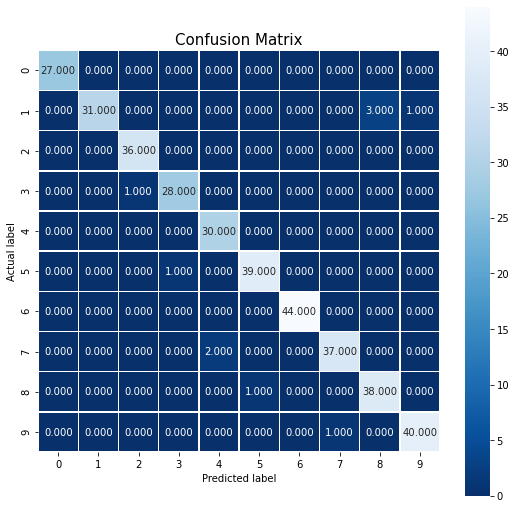

In [31]:
cm2 = metrics.confusion_matrix(y_test, predictions)
print(cm2)


plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Confusion Matrix", size = 15);

### Classification report

In [32]:
from sklearn.metrics import accuracy_score

print("Accuracy : %s\n" % metrics.accuracy_score(y_test, predictions))

mlp_report2 = classification_report(y_test, predictions)
print(mlp_report2)

Accuracy : 0.9722222222222222

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.89      0.94        35
           2       0.97      1.00      0.99        36
           3       0.97      0.97      0.97        29
           4       0.94      1.00      0.97        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       0.97      0.95      0.96        39
           8       0.93      0.97      0.95        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## Multi-class / Algorithm 3 : SVM SVC

In [33]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

from sklearn import svm


clf = svm.SVC(kernel='linear')


clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

predictions[:100]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8])

In [34]:
y_test[:100]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8])

### Confusion Matrix

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  1  1  0  0  0  0  0 37  0]
 [ 0  0  0  1  0  1  0  0  0 39]]


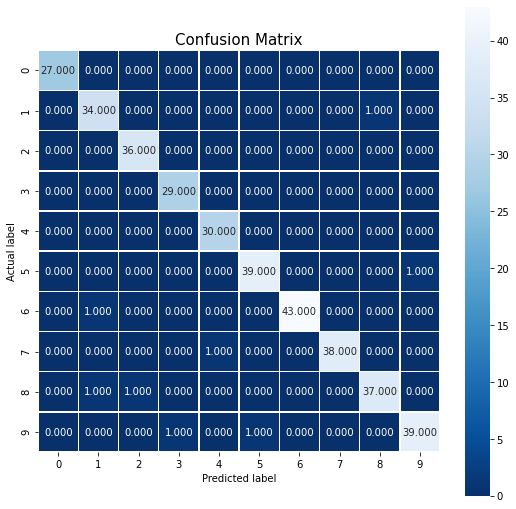

In [35]:
cm2 = metrics.confusion_matrix(y_test, predictions)
print(cm2)


plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Confusion Matrix", size = 15);

### Classification Report

In [36]:
from sklearn.metrics import accuracy_score

print("Accuracy : %s\n" % metrics.accuracy_score(y_test, predictions))

svc_report2 = classification_report(y_test, predictions)
print(svc_report2)

Accuracy : 0.9777777777777777

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.97      0.96        35
           2       0.97      1.00      0.99        36
           3       0.97      1.00      0.98        29
           4       0.97      1.00      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       1.00      0.97      0.99        39
           8       0.97      0.95      0.96        39
           9       0.97      0.95      0.96        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## Conclusion

In [37]:
print("Logistic Regession :\n %s"% log_report2)

print("\n\nMLP :\n %s"% mlp_report2)

print("\n\nSVC : \n %s"% svc_report2)

Logistic Regession :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.89      0.90        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.98        29
           4       0.97      1.00      0.98        30
           5       0.97      0.93      0.95        40
           6       0.98      0.98      0.98        44
           7       1.00      0.97      0.99        39
           8       0.92      0.92      0.92        39
           9       0.91      0.95      0.93        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



MLP :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.89      0.94        35
           2       0.97      1.00      0.99    

#### Surprisingly, compared to binary models, multi-class models are not in the same efficiency. The MPl model have almost the same result as SVC model.

# 5) Gradient descent ?

#### Gradient descent :

We pass the whole
observations, the gradient is calculated, the coefficients are corrected. Etc.


#### Stochastic gradient : 

Stochastic gradient is an approximation of the gradient descent, applicable
when the objective function is written as a sum of differentiable functions: it is
very often the case in supervised learning

#### Pseudo code gradient descent :